In [1]:
import tensorflow as tf

import os
import datetime
import tensorflow_datasets as tfds

In [2]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
train_dataset = dataset['train']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteITXYVV/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [3]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [4]:
print(train_dataset)

<DatasetV1Adapter shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [5]:
len(list(train_dataset))

104975

In [6]:
BUFFER_SIZE = 30000
BATCH_SIZE = 128

In [7]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [8]:
for reviews in train_dataset.take(2):
  print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'34561747'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=2>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B003WLQO6S'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'873875355'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Unirex RX-858 Portable Stereo CD/ MP3 Player with Radio Cassette Recorder'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b"We were looking for a portable stereo with a CD, mp3 and tape player with detachable speakers that can also run on batteries, and found this one.  There were no reviews on it yet, so we were a little hesitant to buy it.  But we did, and are quite pleased with it.    So many reviews on Unirex products say this button didn't work and that player didn't work, but

In [9]:
for reviews in train_dataset.take(10):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  print(review_text.get('star_rating'))
  print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

b"We were looking for a portable stereo with a CD, mp3 and tape player with detachable speakers that can also run on batteries, and found this one.  There were no reviews on it yet, so we were a little hesitant to buy it.  But we did, and are quite pleased with it.    So many reviews on Unirex products say this button didn't work and that player didn't work, but everything on this stereo worked right from the start, and is still working.  It is a nice compact size, maybe as wide as 3 1/2 CD's with the speakers attached.    One really nice feature is the USB port.  I loaded 850+ mp3 songs onto a flash drive and plugged it in.  It shares controls with the CD player, so I set it on random play.  It played music from the flash drive with little or no lag time in between songs in random mode.  There is also a remote for controlling CD/USB play.  You can't control the volume or turn the unit off/on with it though.    The controls are easy to use, but there is no control for tone, just a Bass

In [10]:
tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()
for _, reviews in train_dataset.enumerate():
  #print(reviews)
  review_text = reviews['data']
  reviews_token = tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(reviews_token)

vocab_size = len(vocabulary_set)
vocab_size

73738

In [11]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [12]:
print(vocabulary_set)

{'satillet', 'inventory', 'Correcting', 'True', '2555LMT', 'accidents', 'noxious', 'juts', 'glitters', 'softer', 'Leon', 'M5', 'witgh', '433', 'pinball', 'Namastey', 'lks', 'Accessing', 'Accept', 'boomboxes', 'rlw', '370Z', 's2000', 'tangling', 'Ecello', 'embossing', 'removal', 'ress', 'alley', '2000032', 'disqualifies', 'obd', 'handdle', 'FASTER', 'scraces', 'Carolla', 'Carharts', 'Titan', 'M300', 'remount', 'instult', 'jig', 'viable', 'arms', 'f5', 'gamin', 'BEER', '8ish', 'fallapart', 'seven', 'Afghnanstan', 'anise', 'FD1330B', 'excuse', 'regarding', 'Harry', 'allllllllllll', 'InvisibleShields', 'Candace', 'nope', '316', 'station', 'S3', 'posed', 'miinute', 'sead', 'RWs', 'discard', 'viewscreen', 'Coloradopointing', 'stroboscopic', 'EGSJtv5KZ_A', 'Skinomi', 'hysterics', 'inboard', 'enamel', 'highball', 'photocopied', 'protrudes', 'comprehensible', 'Wristband', 'stabilizing', 'Flygrip', 'Minuses', 'exiting', 'N95', 'carriers', 'witness', 'replenished', '10w', 'actuation', 'Archer', '

In [13]:
for reviews in train_dataset.take(5):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example = encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)

b"We were looking for a portable stereo with a CD, mp3 and tape player with detachable speakers that can also run on batteries, and found this one.  There were no reviews on it yet, so we were a little hesitant to buy it.  But we did, and are quite pleased with it.    So many reviews on Unirex products say this button didn't work and that player didn't work, but everything on this stereo worked right from the start, and is still working.  It is a nice compact size, maybe as wide as 3 1/2 CD's with the speakers attached.    One really nice feature is the USB port.  I loaded 850+ mp3 songs onto a flash drive and plugged it in.  It shares controls with the CD player, so I set it on random play.  It played music from the flash drive with little or no lag time in between songs in random mode.  There is also a remote for controlling CD/USB play.  You can't control the volume or turn the unit off/on with it though.    The controls are easy to use, but there is no control for tone, just a Bass

In [14]:
for index in encoded_example:
  print('{} ----> {}'.format(index,encoder.decode([index])))

46854 ----> stay
42199 ----> away
31096 ----> I
41795 ----> bought
5244 ----> this
45983 ----> and
10623 ----> now
34401 ----> use
22498 ----> it
31920 ----> as
662 ----> a
14026 ----> door
54636 ----> stop
3384 ----> Not
47962 ----> even
49534 ----> good
71337 ----> at
36058 ----> that
23764 ----> screen
9826 ----> is
44444 ----> hard
61697 ----> to
73186 ----> read
70647 ----> with
33782 ----> any
42818 ----> glare


In [15]:
def encode(text_tensor, label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label = tf.where(label_tensor>3,1,0)
  return encoded_text, label

In [16]:
def encode_map_fn(tensor):

  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating')

  encoded_text, label = tf.py_function(encode,
                                       inp=[text,label],
                                       Tout=(tf.int64, tf.int32))
  
  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [17]:
def encode_map_fn(tensor):

  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating')

  encoded_text, label = tf.py_function(encode,
                                       inp=[text, label],
                                       Tout=(tf.int64, tf.int32))
  
  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [18]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [19]:
for f0,f1 in ar_encoded_data.take(2):
  print(f0)
  print(f1)


tf.Tensor(
[49830 51195 28307 44086   662 15291 64677 70647   662 70407 54899 45983
 34470 25312 70647  3195 20865 36058 51284 45145 16895 41512 17555 45983
 33629  5244 57446 45420 51195 15828 51465 41512 22498 63411  3088 22212
 51195   662 72655 48619 61697  9364 22498 17574 22212 36436 45983 47521
  2516 62497 70647 22498 32225 41866 51465 41512 36566 62195  1551  5244
 53249 27951 26061 19818 45983 36058 25312 27951 26061 19818 55827 11826
 41512  5244 64677 10437  8404 64119 19176 42603 45983  9826  5137 47131
 49742  9826   662 60484  3109 45244 43201 31920 25930 31920 11896 42756
  9777 70407 30005 70647 19176 20865 35702  7461 69796 60484 22081  9826
 19176  1396 48350 31096 49407  1729 54899 26221 31620   662 19614 43563
 45983 26611 22498 59220 49742 24191 15429 70647 19176 70407 25312  3088
 31096 66143 22498 41512 23289 12854 49742 64459 55501 64119 19176 19614
 43563 70647 72655 45712 15828  5434 46644 59220 12533 26221 59220 23289
  4057 45420  9826 45145   662 65968 440

In [20]:
TAKE_SIZE=10000

train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)

test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

In [21]:
vocab_size += 1

In [22]:
sample_text,sample_labels = next(iter(test_data))

sample_text[0], sample_labels[0]


(<tf.Tensor: shape=(862,), dtype=int64, numpy=
 array([49830, 51195, 28307, 44086,   662, 15291, 64677, 70647,   662,
        70407, 54899, 45983, 34470, 25312, 70647,  3195, 20865, 36058,
        51284, 45145, 16895, 41512, 17555, 45983, 33629,  5244, 57446,
        45420, 51195, 15828, 51465, 41512, 22498, 63411,  3088, 22212,
        51195,   662, 72655, 48619, 61697,  9364, 22498, 17574, 22212,
        36436, 45983, 47521,  2516, 62497, 70647, 22498, 32225, 41866,
        51465, 41512, 36566, 62195,  1551,  5244, 53249, 27951, 26061,
        19818, 45983, 36058, 25312, 27951, 26061, 19818, 55827, 11826,
        41512,  5244, 64677, 10437,  8404, 64119, 19176, 42603, 45983,
         9826,  5137, 47131, 49742,  9826,   662, 60484,  3109, 45244,
        43201, 31920, 25930, 31920, 11896, 42756,  9777, 70407, 30005,
        70647, 19176, 20865, 35702,  7461, 69796, 60484, 22081,  9826,
        19176,  1396, 48350, 31096, 49407,  1729, 54899, 26221, 31620,
          662, 19614, 43563, 4

In [23]:
for f0,f1 in test_data.take(10):
  print(tf.unique_with_counts(f1)[2].numpy())

[87 41]
[85 43]
[81 47]
[42 86]
[91 37]
[87 41]
[82 46]
[79 49]
[42 86]
[88 40]


In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
#model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
for units in [64, 64]:
  model.add(tf.keras.layers.Dense(units, activation = 'relu'))
  #model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

In [26]:
logdir = os.path.join("/tmp/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/tmp/sentiment_analysis.hdf5', verbose=1, save_best_only=True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
history = model.fit(train_data, epochs=4, validation_data=test_data, callbacks=[tensorboard_callback,checkpointer])

Epoch 1/4
      1/Unknown - 0s 536us/step - loss: 0.6938 - accuracy: 0.3672WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


    742/Unknown - 264s 355ms/step - loss: 0.3357 - accuracy: 0.8506
Epoch 00001: val_loss improved from inf to 0.30252, saving model to /tmp/sentiment_analysis.hdf5
742/742 [==============================] - 279s 377ms/step - loss: 0.3357 - accuracy: 0.8506 - val_loss: 0.3025 - val_accuracy: 0.8649
Epoch 2/4
742/742 [==============================] - ETA: 0s - loss: 0.2752 - accuracy: 0.8839
Epoch 00002: val_loss did not improve from 0.30252
742/742 [==============================] - 275s 371ms/step - loss: 0.2752 - accuracy: 0.8839 - val_loss: 0.3153 - val_accuracy: 0.8274
Epoch 3/4
742/742 [==============================] - ETA: 0s - loss: 0.2166 - accuracy: 0.9096
Epoch 00003: val_loss did not improve from 0.30252
742/742 [==============================] - 276s 372ms/step - loss: 0.2166 - accuracy: 0.9096 - val_loss: 0.3269 - val_accuracy: 0.8564
Epoch 4/4
742/742 [==============================] - ETA: 0s - loss: 0.1798 - accuracy: 0.9261
Epoch 00004: val_loss did not improve from 

In [28]:
model.save('/tmp/final_sentiment_analysis.hdf5')

In [29]:
!ls -alrt /tmp/*.hdf5

-rw-r--r-- 1 root root 118632960 Oct 16 16:06 /tmp/sentiment_analysis.hdf5
-rw-r--r-- 1 root root 118632960 Oct 16 16:28 /tmp/final_sentiment_analysis.hdf5


In [30]:
eval_loss, eval_acc = model.evaluate(test_data)

print('\nEval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

79/79 [==============================] - 15s 189ms/step - loss: 0.3159 - accuracy: 0.8823

Eval loss: 0.316, Eval accuracy: 0.882


In [31]:
for f0,f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))

tf.Tensor(
[1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0
 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0], shape=(128,), dtype=int32)
[[ 2.241168  ]
 [ 5.9118075 ]
 [ 5.7254233 ]
 [-1.605035  ]
 [-2.4355834 ]
 [ 4.0835905 ]
 [-1.72863   ]
 [ 6.007667  ]
 [-2.0001943 ]
 [-2.6058176 ]
 [ 6.049895  ]
 [-5.494093  ]
 [ 2.2109506 ]
 [ 4.360527  ]
 [ 5.8545313 ]
 [-4.0258875 ]
 [ 2.669186  ]
 [-1.2627721 ]
 [ 5.9065123 ]
 [ 5.89533   ]
 [-4.268715  ]
 [-2.6351423 ]
 [ 3.9657562 ]
 [-3.4438214 ]
 [-0.6263621 ]
 [-3.7331004 ]
 [-0.73963726]
 [ 4.526583  ]
 [ 5.1189613 ]
 [ 3.5167391 ]
 [-1.4796307 ]
 [-5.4100924 ]
 [ 5.650814  ]
 [-2.205182  ]
 [ 5.9162884 ]
 [ 5.6621685 ]
 [ 4.893633  ]
 [ 5.1672783 ]
 [ 4.404549  ]
 [ 6.0812216 ]
 [ 3.790021  ]
 [-3.441205  ]
 [-4.396707  ]
 [ 1.1261531 ]
 [ 6.0296206 ]
 [-1.7995573 ]
 [ 0.11287

In [32]:
model.layers

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         9438592   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,878,593
Trainable params: 9,878,593
Non-trainable params: 0
______________________________________________

In [34]:
model.get_layer('embedding').output

<tf.Tensor 'embedding/embedding_lookup/Identity_1:0' shape=(None, None, 128) dtype=float32>

In [35]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show

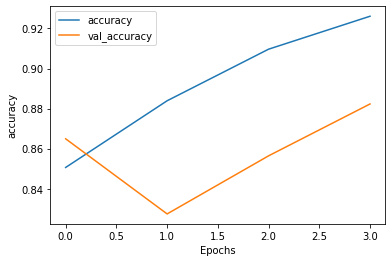

In [36]:
plot_graphs(history, 'accuracy')

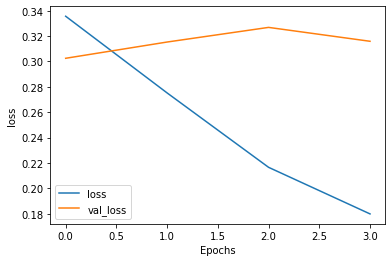

In [37]:
plot_graphs(history, 'loss')

In [38]:
tf.keras.backend.clear_session()
sa_load = tf.keras.models.load_model('/tmp/sentiment_analysis.hdf5',compile = False)

In [39]:
def pad_to_size(vec,size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [41]:
def predict_fn(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text, 32)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))

  return (predictions)

In [43]:
pred_text = ('This watch is pretty bad. Color and dial looks pathetic')
predictions = predict_fn(pred_text)
print(predictions)

[4091, 35499, 9826, 27888, 13898, 73624, 45983, 10874, 4863, 33276]
[4091, 35499, 9826, 27888, 13898, 73624, 45983, 10874, 4863, 33276, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-0.7087701]]


In [44]:
pred_text = ('Amazing Product. Fast Delivery. Nice Packing')
predictions = predict_fn(pred_text)
print(predictions)

[27008, 2316, 42916, 60706, 59722, 19605]
[27008, 2316, 42916, 60706, 59722, 19605, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[5.3684077]]


In [45]:
pred_text = ('Nice Product. Packing could have been better')
predictions = predict_fn(pred_text)
print(predictions)

[59722, 2316, 19605, 25002, 34056, 63941, 16666]
[59722, 2316, 19605, 25002, 34056, 63941, 16666, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[2.335088]]


In [46]:
print(tf.distribute.get_strategy())